In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [2]:
cd ..

/home/dhatri


In [3]:
cd Documents/UDEMY_TSA_FINAL/Data/

/home/dhatri/Documents/UDEMY_TSA_FINAL/Data


In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
from pmdarima import auto_arima

In [7]:
df = pd.read_csv('co2_mm_mlo.csv')

In [8]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [9]:
df['date'] = pd.to_datetime({'year':df['year'], 'month':df['month'], 'day':1})

In [10]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [12]:
df = df.set_index('date')

In [13]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [14]:
df.index.freq = 'MS'

<Axes: xlabel='date'>

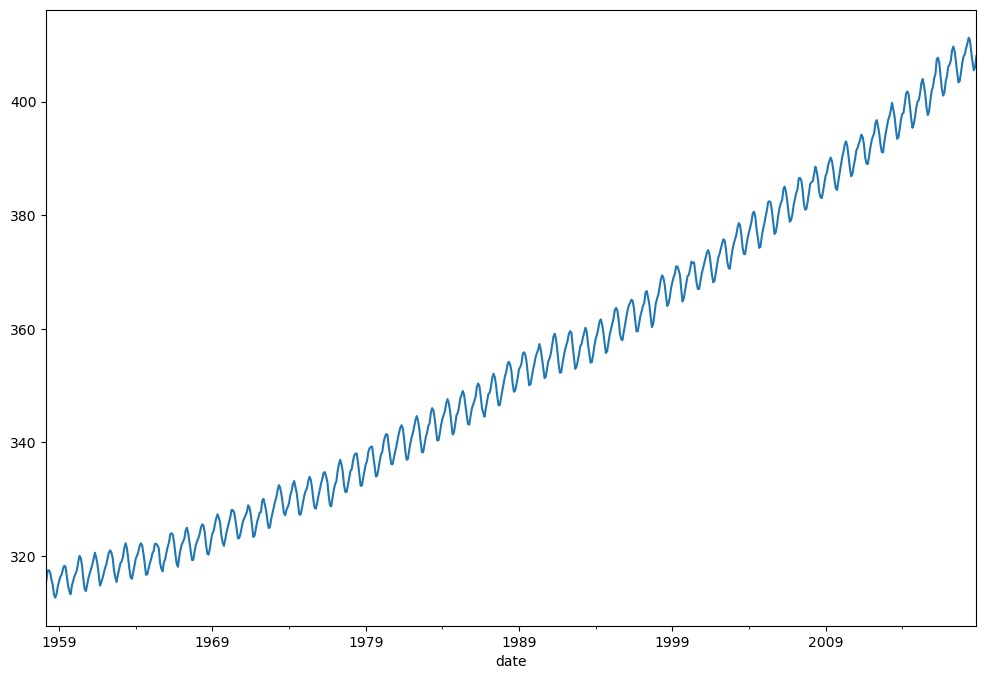

In [15]:
df['interpolated'].plot()

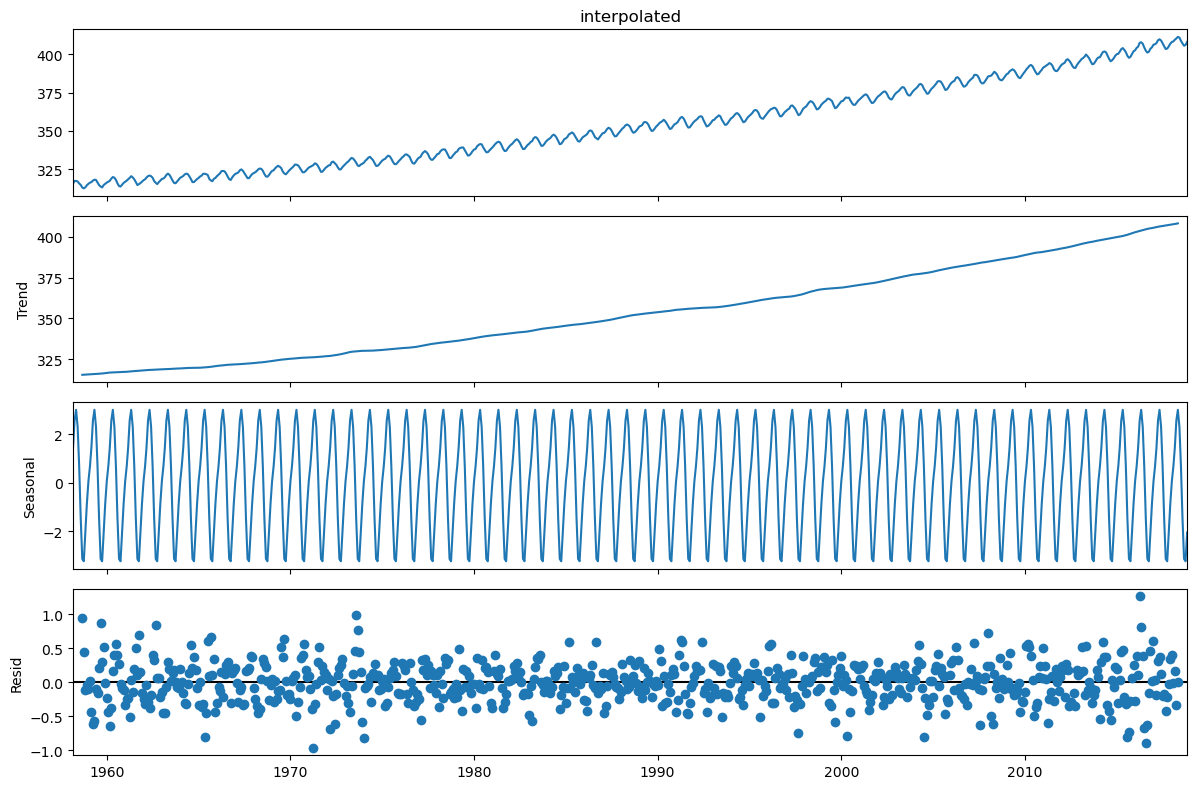

In [16]:
seasonal_decompose(df['interpolated'], model='add').plot();

In [18]:
auto_arima(df['interpolated'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.257
Date:                            Sun, 09 Jun 2024   AIC                            424.514
Time:                                    21:57:35   BIC                            452.056
Sample:                                03-01-1958   HQIC                           435.141
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3475      0.073      4.777      0.000       0.205       0.490
ar.L2          0.0842      0.025      3.351      0.001       0.035       0.133
ma.L1         -0.7030      0.061    -11.607      0.000      -0.822      -0.584
ar.S.L12       0.9997      0.000   3071.283      0.000       0.999       1.000
ma.S.L12      -0.8679      0.021    -41.138      0.000      -0.909      -0.827
sigma2         0.0957      0.005     20.996      0.000       0.087       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.58
Prob(Q):                              0.79   Prob(JB):                         0.10
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
len(df)

729

In [20]:
train = df.iloc[:717]
test = df.iloc[717:]

In [22]:
model = SARIMAX(train['interpolated'], order=(2, 1, 1), seasonal_order=(1, 0, 1, 12))

In [27]:
results = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.01395D-01    |proj g|=  6.33008D-01

At iterate    5    f=  5.63188D-01    |proj g|=  2.16128D-01

At iterate   10    f=  2.97624D-01    |proj g|=  3.88111D-02

At iterate   15    f=  2.92007D-01    |proj g|=  3.74286D-02

At iterate   20    f=  2.91138D-01    |proj g|=  1.93657D-02

At iterate   25    f=  2.89848D-01    |proj g|=  8.67227D-03

At iterate   30    f=  2.89660D-01    |proj g|=  1.27155D-02

At iterate   35    f=  2.85940D-01    |proj g|=  2.85601D-02

At iterate   40    f=  2.81752D-01    |proj g|=  8.44807D-03

At iterate   45    f=  2.81606D-01    |proj g|=  2.30944D-03

At iterate   50    f=  2.81602D-01    |proj g|=  1.25413D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/dhatri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
start = len(train)
end = len(train) + len(test) - 1


In [30]:
pred = results.predict(start, end, typ='levels').rename('SARIMA Predictions').rename('SARIMA Predictions')

<Axes: xlabel='date'>

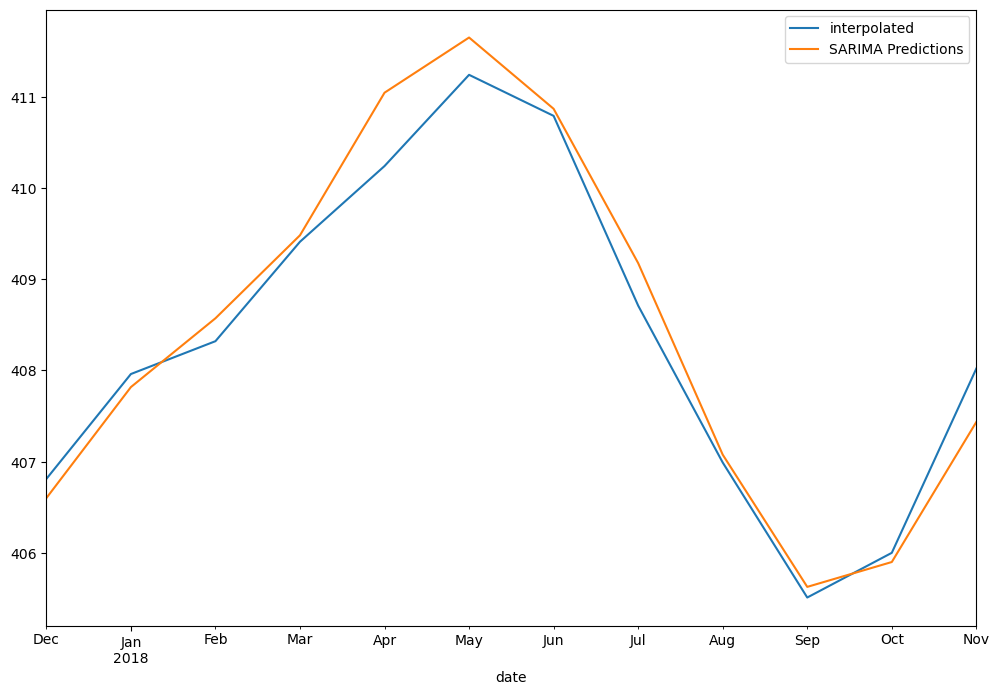

In [31]:
test['interpolated'].plot(legend=True)
pred.plot(legend=True)

In [32]:
from statsmodels.tools.eval_measures import rmse
error = rmse(test['interpolated'], pred)

In [33]:
error

0.3586311975345668

In [34]:
#if youre unsure about whether thats good or bad, you should take 
# the mean of the test predictions and compare it to the actual
# dataset and see if they are comparable

In [35]:
model = SARIMAX(df['interpolated'], order=(0, 1, 1), seasonal_order=(1, 0, 1, 12))

In [36]:
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.01395D-01    |proj g|=  6.33008D-01

At iterate    5    f=  5.63188D-01    |proj g|=  2.16128D-01


 This problem is unconstrained.



At iterate   10    f=  2.97624D-01    |proj g|=  3.88111D-02

At iterate   15    f=  2.92007D-01    |proj g|=  3.74286D-02

At iterate   20    f=  2.91138D-01    |proj g|=  1.93657D-02

At iterate   25    f=  2.89848D-01    |proj g|=  8.67227D-03

At iterate   30    f=  2.89660D-01    |proj g|=  1.27155D-02

At iterate   35    f=  2.85940D-01    |proj g|=  2.85601D-02

At iterate   40    f=  2.81752D-01    |proj g|=  8.44807D-03

At iterate   45    f=  2.81606D-01    |proj g|=  2.30944D-03

At iterate   50    f=  2.81602D-01    |proj g|=  1.25413D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     67   

/home/dhatri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
fcast = results.predict(len(df), len(df) +11, typ='levels').rename('SARIMA fcast')

<Axes: xlabel='date'>

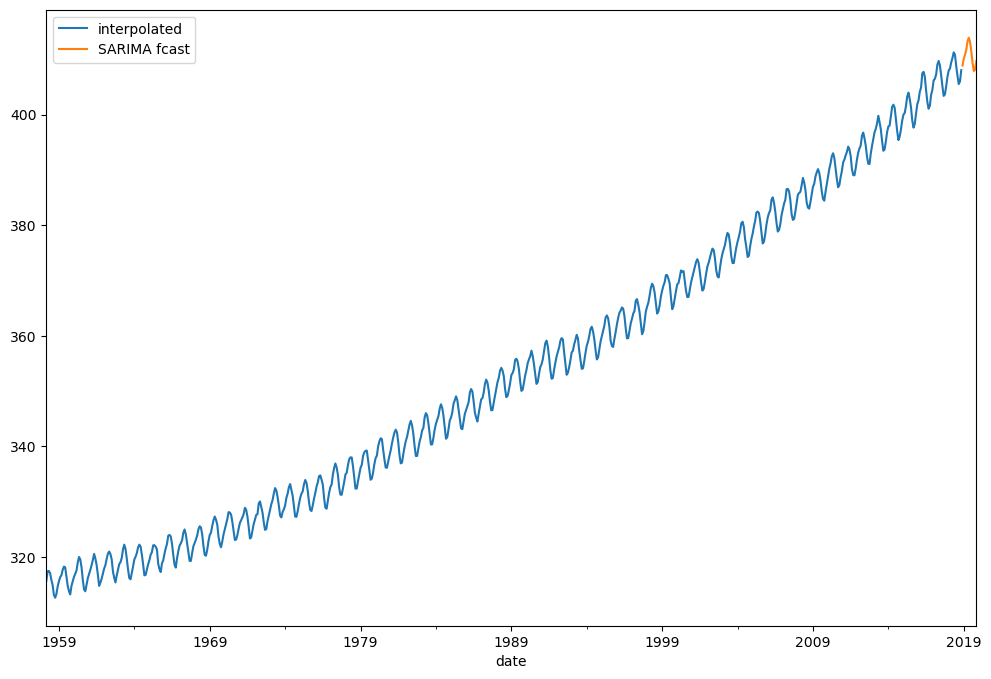

In [43]:
df['interpolated'].plot(legend=True)
fcast.plot(legend=True)